In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/hp5cd/Downloads/breast-cancer.csv")  
print(df.head())
print(df.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [3]:
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

In [4]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [5]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [9]:
y_pred_linear = linear_svm.predict(X_test)
print("Linear SVM Classification Report:\n", classification_report(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

Linear SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[68  3]
 [ 2 41]]


In [10]:
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)

SVC(C=1)

In [11]:
y_pred_rbf = rbf_svm.predict(X_test)
print("RBF SVM Classification Report:\n", classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

RBF SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


In [12]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)
print("Best Parameters from GridSearchCV:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters from GridSearchCV: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Score: 0.9758241758241759


In [13]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Test Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best Model Test Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[71  0]
 [ 2 41]]


In [15]:
cv_scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
Mean CV score: 0.9121720229777983


In [16]:
features = ['radius_mean', 'texture_mean']
X_vis = df[features]
y_vis = df['diagnosis']

In [17]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42)

In [18]:
X_train_vis = scaler.fit_transform(X_train_vis)
X_test_vis = scaler.transform(X_test_vis)

In [19]:
svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_train_vis, y_train_vis)

SVC(C=1)

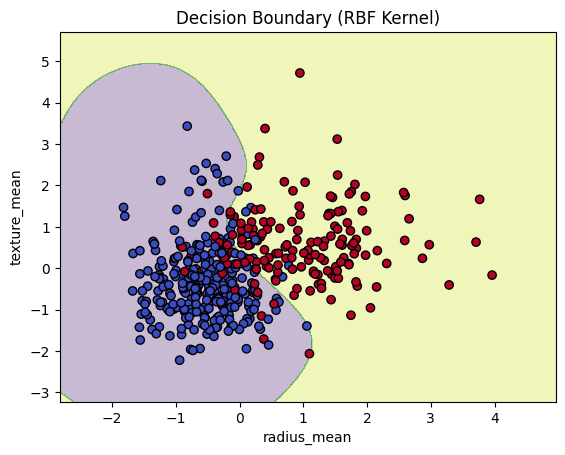

In [20]:
def plot_decision_boundary(X, y, model):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title("Decision Boundary (RBF Kernel)")
    plt.show()
plot_decision_boundary(X_train_vis, y_train_vis.to_numpy(), svm_vis)